In [1]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
import import_ipynb
import Zad0_kMeans as km

importing Jupyter notebook from Zad0_kMeans.ipynb


In [3]:
import poprawnoscGrupowania as pg

# Zadanie 3, Lista 3

In [4]:
def indeksPoprawnosciGrupowaniaSort(grupowanieTest, grupowanieRef,debug=False):
    '''Tworzy tablicę długości K z ideksem poprawności danej grupy.
    Indeks poprawności danej grupy jest zwiększany o 1 za każdy element,
    który został przypisany do tej grupy, choć nie powinien wd=edług przypisania referencyjnego.
    Wymagane jest aby oba grupowania miały tyle samo grup i ich numerowanie zaczynało się od 0.
    GrupowanieRef musi być posortowane.'''
    indeksPoprawnosci=np.zeros(np.max(grupowanieRef)+1)
    
    nrTPop=grupowanieTest[0]
    nrRPop=grupowanieRef[0]
    for i in range(1,np.size(grupowanieRef)):
        nrRef=grupowanieRef[i]
        nrTest=grupowanieTest[i]
        
        if (nrTest!=nrTPop and nrRPop==nrRef):
            indeksPoprawnosci[nrRef]+=1
        if (nrRPop!=nrRef and nrTest==nrTPop):
            indeksPoprawnosci[nrRef]+=1
        nrTPop=nrTest
        nrRPop=nrRef
    licznoscGrupTest=np.unique(grupowanieTest,return_counts=True)[1]
    licznoscGrupRef=np.unique(grupowanieRef,return_counts=True)[1]
    if debug==True:
        print(np.shape(licznoscGrupTest))
        print(np.shape(licznoscGrupRef))
    return indeksPoprawnosci*licznoscGrupTest/(licznoscGrupRef**2)

## Wine

In [5]:
winoTekst=np.loadtxt("Wine/wine.data",delimiter=',').T

In [6]:
poprawnePrzypisanieWina=np.array(winoTekst[0,:],dtype=int)-1
wino=winoTekst[1:,:]

In [7]:
wino

array([[1.423e+01, 1.320e+01, 1.316e+01, ..., 1.327e+01, 1.317e+01,
        1.413e+01],
       [1.710e+00, 1.780e+00, 2.360e+00, ..., 4.280e+00, 2.590e+00,
        4.100e+00],
       [2.430e+00, 2.140e+00, 2.670e+00, ..., 2.260e+00, 2.370e+00,
        2.740e+00],
       ...,
       [1.040e+00, 1.050e+00, 1.030e+00, ..., 5.900e-01, 6.000e-01,
        6.100e-01],
       [3.920e+00, 3.400e+00, 3.170e+00, ..., 1.560e+00, 1.620e+00,
        1.600e+00],
       [1.065e+03, 1.050e+03, 1.185e+03, ..., 8.350e+02, 8.400e+02,
        5.600e+02]])

In [8]:
np.shape(wino)

(13, 178)

In [9]:
poprawnePrzypisanieWina

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
(centraWinaE,przynaleznoscWinaE)=km.kMeans(wino,3)

12


In [11]:
przynaleznoscWinaE=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscWinaE)

In [12]:
(centraWinaM, przynaleznoscWinaM)=km.kMeans(wino,3,odl="mahalanobis")

5


In [13]:
przynaleznoscWinaM=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscWinaM)

In [14]:
(centraWinaW, przynaleznoscWinaW)=km.kMeans(wino,3,odl="own",
                                            f_odl_own=lambda x,y:distance.cdist(x.T,y.T,"minkowski",p=13))

5


In [15]:
przynaleznoscWinaW=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscWinaW)

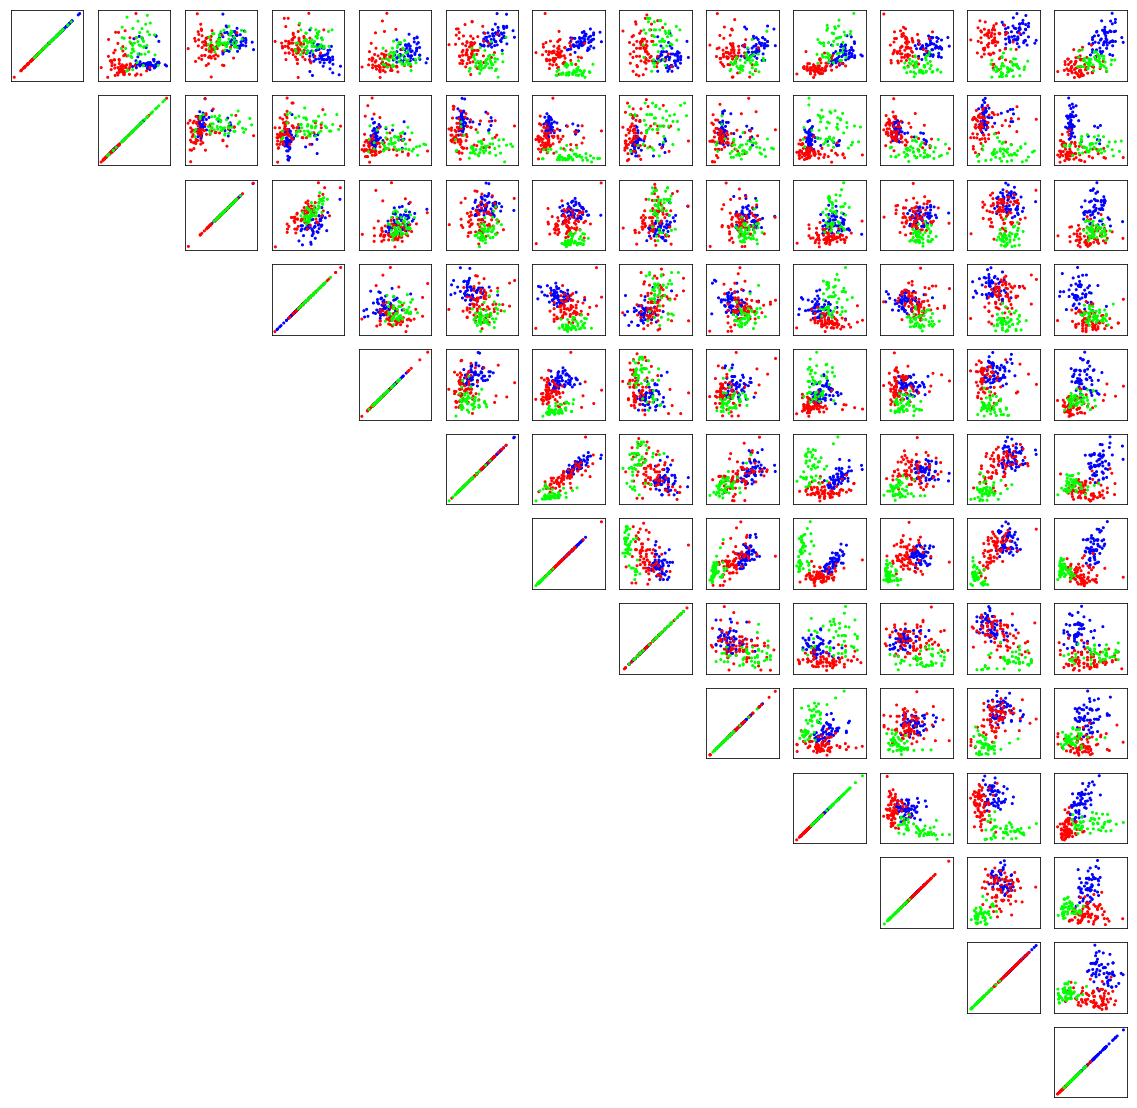

In [16]:
pg.rysujGrupyPoWszystkichKombinacjach(wino,poprawnePrzypisanieWina,13)

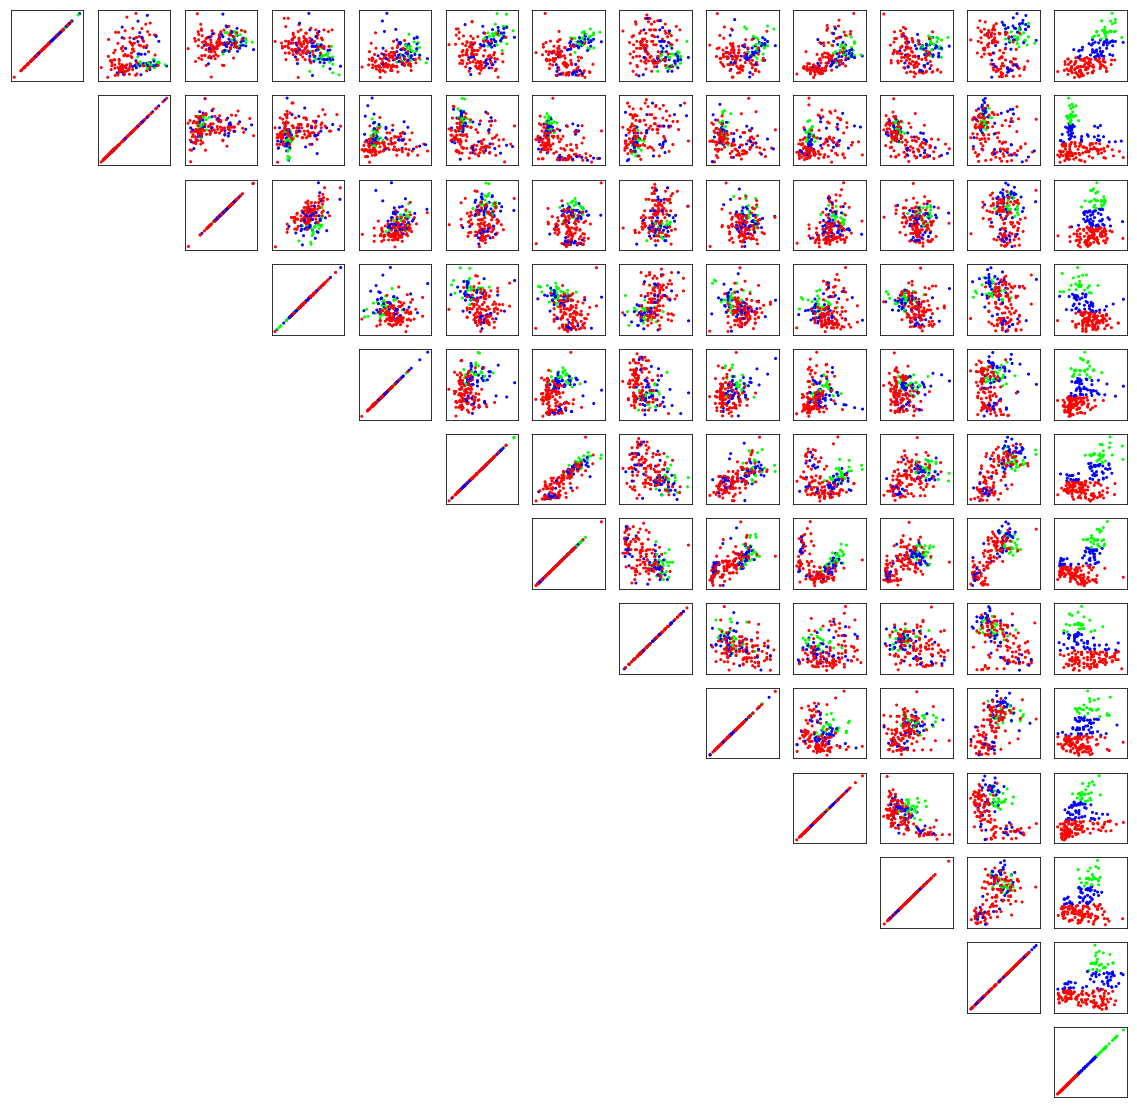

In [17]:
pg.rysujGrupyPoWszystkichKombinacjach(wino,przynaleznoscWinaE,13)

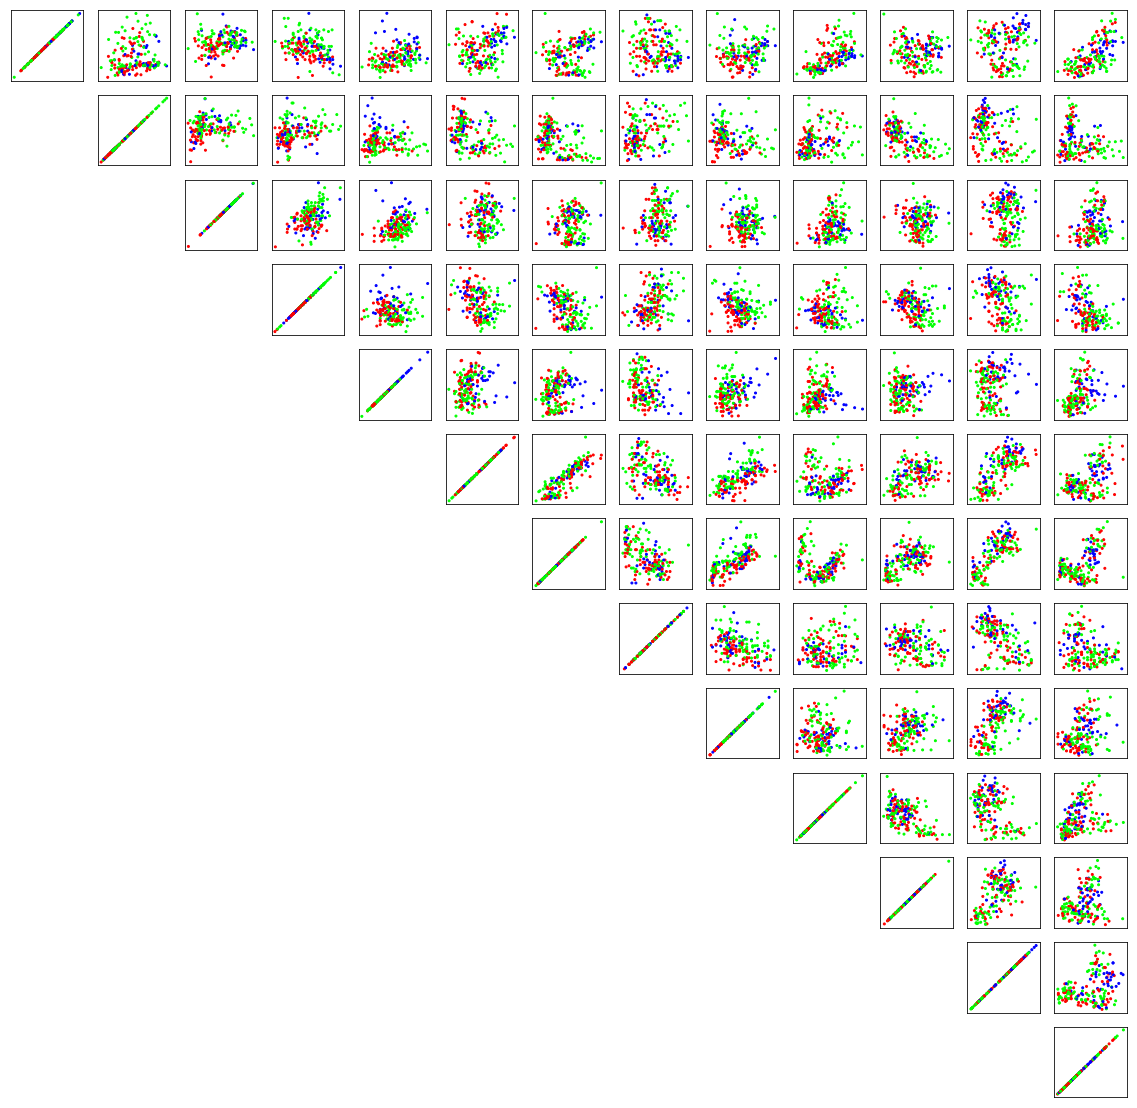

In [18]:
pg.rysujGrupyPoWszystkichKombinacjach(wino,przynaleznoscWinaM,13)

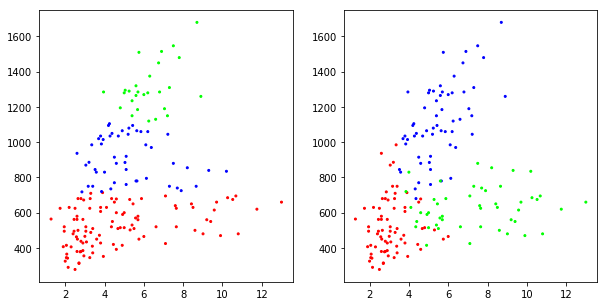

In [19]:
plt.gcf().set_size_inches(10,5)
plt.subplot(1,2,1)
pg.rysujNaWykresieGrupy(wino[9,:],wino[12,:],przynaleznoscWinaE)
plt.subplot(1,2,2)
pg.rysujNaWykresieGrupy(wino[9,:],wino[12,:],poprawnePrzypisanieWina)

In [20]:
winoZredkuowane=wino[11:,:]

In [21]:
(centraWinaZE,przynaleznoscWinaZE)=km.kMeans(winoZredkuowane,3)
(centraWinaZM,przynaleznoscWinaZM)=km.kMeans(winoZredkuowane,3,odl="mahalanobis",iteracje=1600)

5
13


In [22]:
przynaleznoscWinaZE=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscWinaZE)
przynaleznoscWinaZM=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscWinaZM)

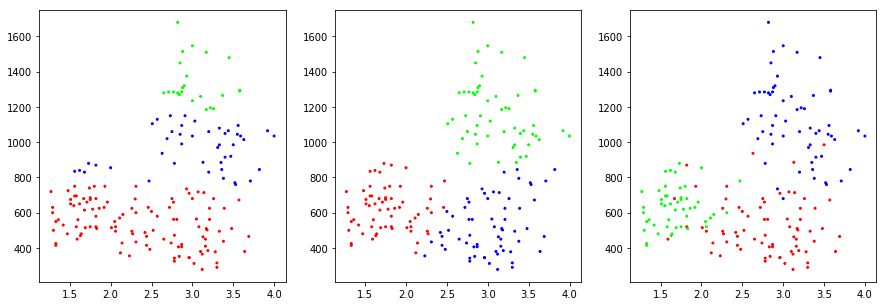

In [23]:
plt.gcf().set_size_inches(15,5)
plt.subplot(1,3,1)
pg.rysujNaWykresieGrupy(winoZredkuowane[0,:],winoZredkuowane[1,:],przynaleznoscWinaZE)
plt.subplot(1,3,2)
pg.rysujNaWykresieGrupy(winoZredkuowane[0,:],winoZredkuowane[1,:],przynaleznoscWinaZM)
plt.subplot(1,3,3)
pg.rysujNaWykresieGrupy(winoZredkuowane[0,:],winoZredkuowane[1,:],poprawnePrzypisanieWina)

In [24]:
przynaleznoscWinaZE

array([0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1])

In [25]:
przynaleznoscWinaZM

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [26]:
print(indeksPoprawnosciGrupowaniaSort(przynaleznoscWinaE,poprawnePrzypisanieWina))
print(indeksPoprawnosciGrupowaniaSort(przynaleznoscWinaM,poprawnePrzypisanieWina))
print(indeksPoprawnosciGrupowaniaSort(przynaleznoscWinaZE,poprawnePrzypisanieWina))
print(indeksPoprawnosciGrupowaniaSort(przynaleznoscWinaZM,poprawnePrzypisanieWina))

[0.26745188 0.16187264 0.17578125]
[0.36024131 0.46419361 0.87890625]
[0.29072106 0.13211664 0.08984375]
[0.17810974 0.31243801 0.        ]


## Seeds

In [27]:
nasionaTekst=np.loadtxt("Seeds/seeds_dataset.txt").T

In [28]:
np.shape(nasionaTekst)


(8, 210)

In [29]:
nasionaPoprawnePrzypisanie=np.array(nasionaTekst[7,:],dtype=int)-1
nasiona=nasionaTekst[0:7,:]

In [30]:
(centraNasionaE,przynaleznosciNasionaE)=km.kMeans(nasiona,3)
(centraNasionaM,przynaleznosciNasionaM)=km.kMeans(nasiona,3,odl="mahalanobis")

5
24


In [31]:
przynaleznosciNasionaE=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznosciNasionaE)
przynaleznosciNasionaM=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznosciNasionaM)

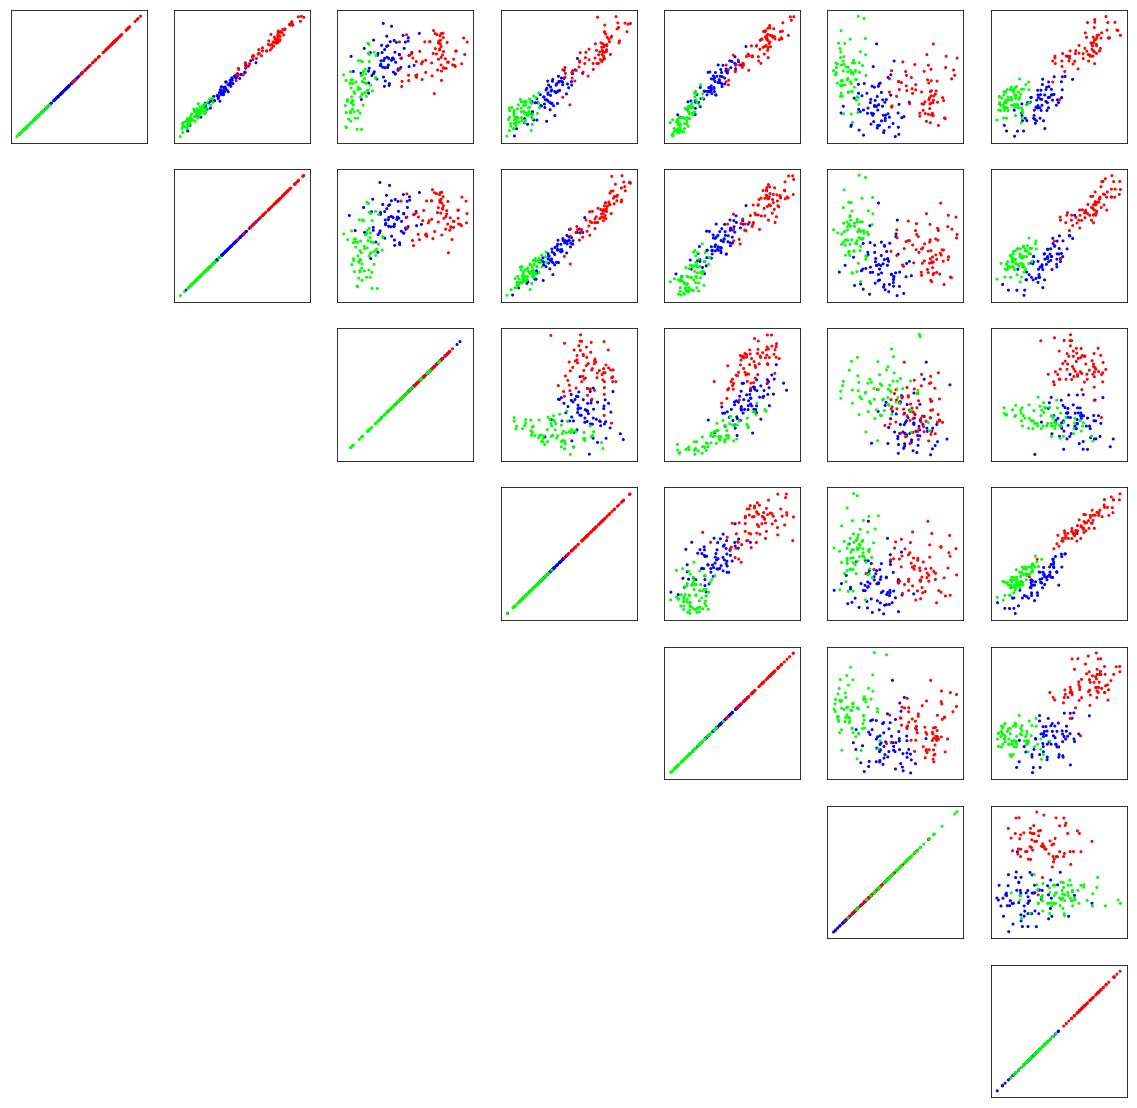

In [114]:
pg.rysujGrupyPoWszystkichKombinacjach(nasiona, nasionaPoprawnePrzypisanie,7)

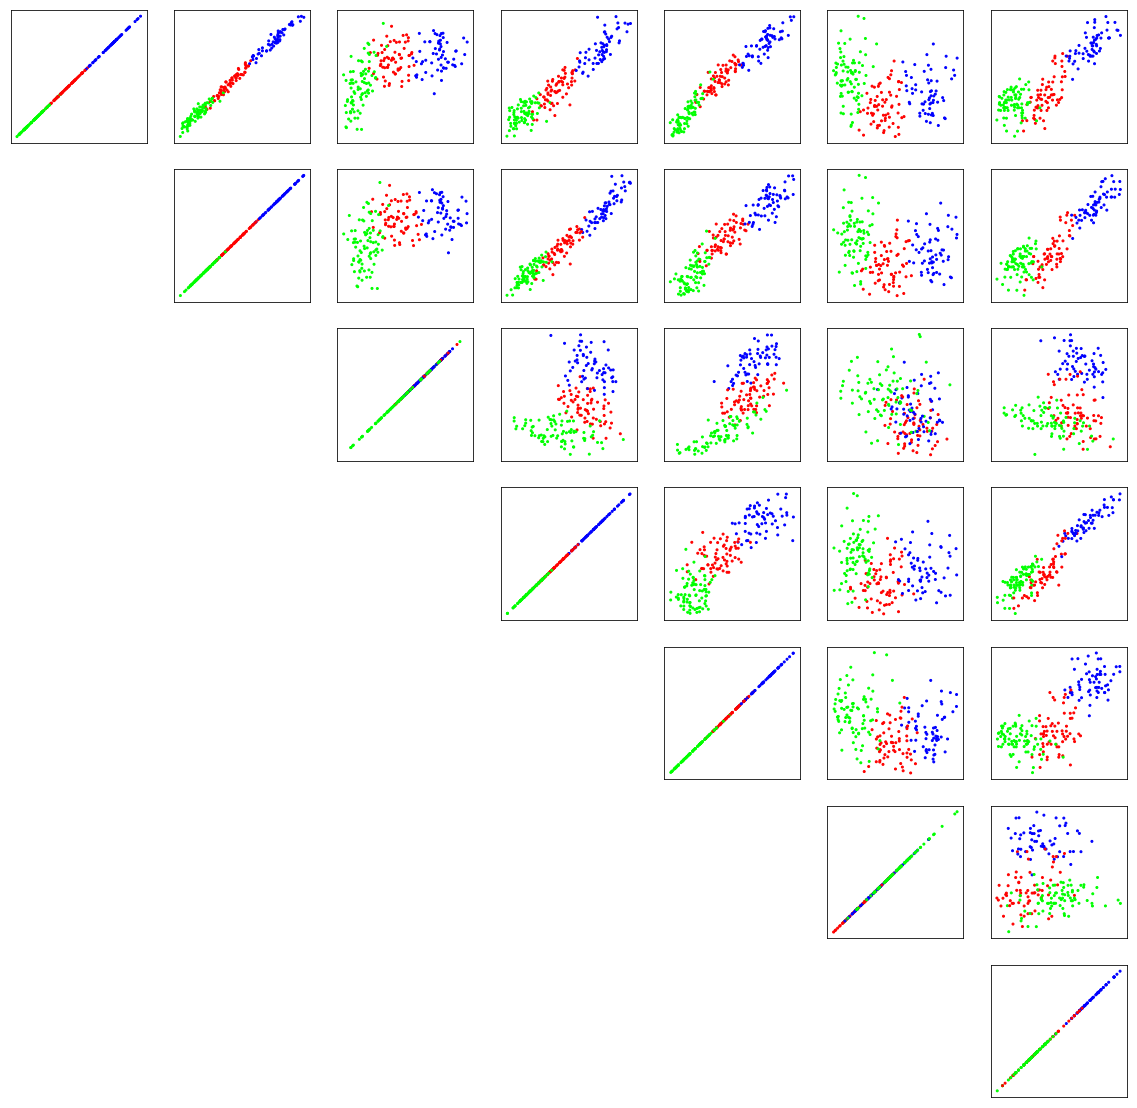

In [115]:
pg.rysujGrupyPoWszystkichKombinacjach(nasiona, przynaleznosciNasionaE,7)

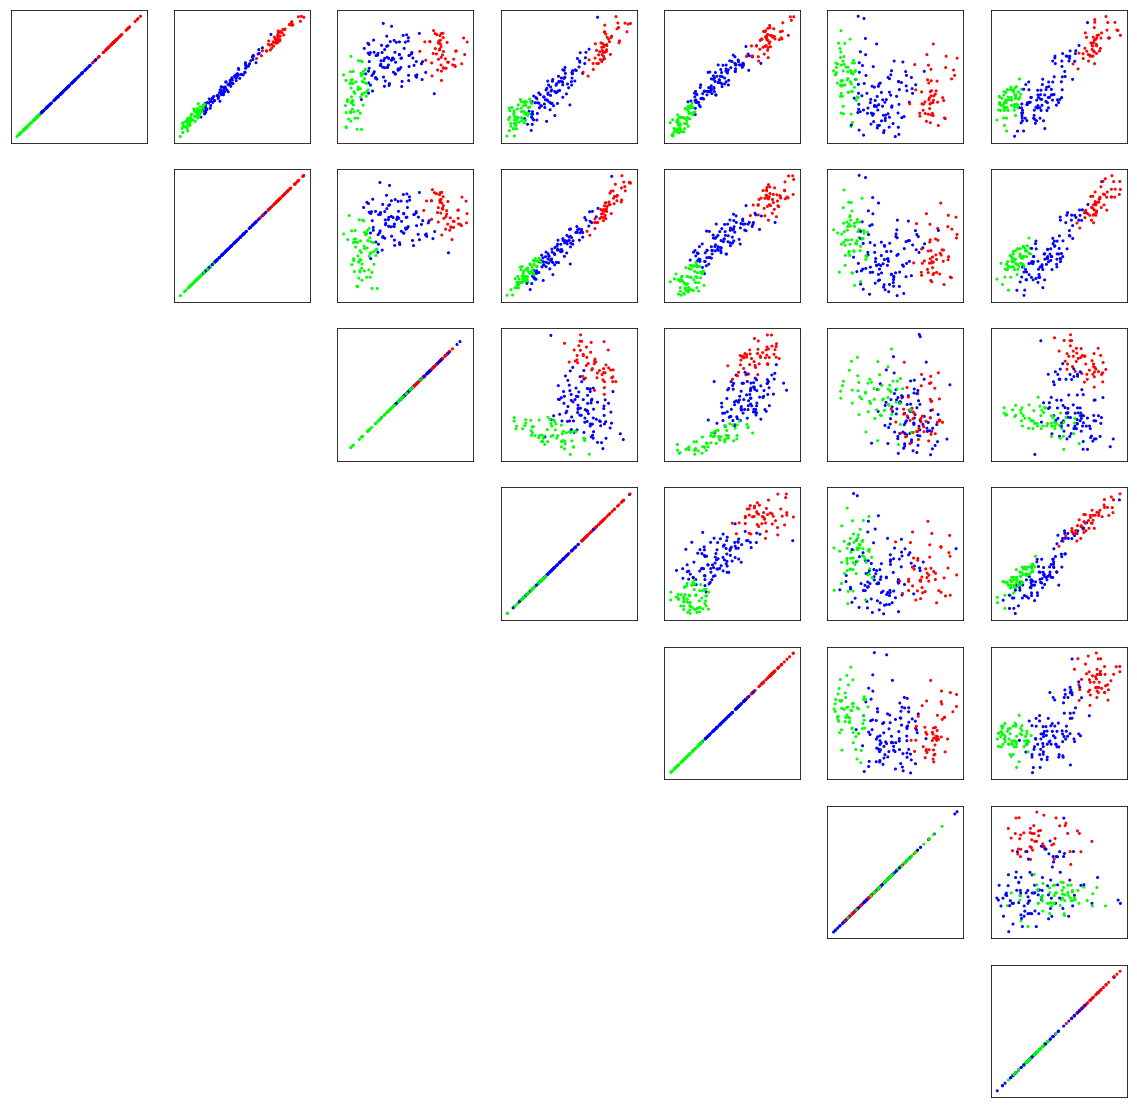

In [116]:
pg.rysujGrupyPoWszystkichKombinacjach(nasiona, przynaleznosciNasionaM,7)

In [35]:
print("Poprawne:")
print(nasionaPoprawnePrzypisanie)
print("Euklides:")
print(przynaleznosciNasionaE)
print("Mahalanobis:")
print(przynaleznosciNasionaM)

Poprawne:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Euklides:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1
 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Mahalanobis:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [36]:
print(indeksPoprawnosciGrupowaniaSort(przynaleznosciNasionaE,nasionaPoprawnePrzypisanie))
print(indeksPoprawnosciGrupowaniaSort(przynaleznosciNasionaM,nasionaPoprawnePrzypisanie))

[0.18673469 0.12306122 0.        ]
[0.08081633 0.15306122 0.19918367]


## E.coli    

In [37]:
ecoli=np.genfromtxt("Ecola/ecoli.data",usecols=(1,2,3,4,5,6,7)).T
ecoliPrzyporzadowanieTekst=np.genfromtxt("Ecola/ecoli.data",usecols=(8),dtype="S3").T

In [38]:
ecoliPrzyporzadkowanie=np.array([0 if i==b"cp"
                                 else 1 if i==b"im"
                                 else 2 if i==b"pp"
                                 else 3 if i==b"imU"
                                 else 4 if i==b"om"
                                 else 5 if i==b"omL"
                                 else 6 if i==b"imL"
                                 else 7
                                 for i in ecoliPrzyporzadowanieTekst])

In [39]:
np.shape(ecoli)

(7, 336)

In [40]:
(centraEcoliE,przynaleznosciEcoliE)=km.kMeans(ecoli,8)
(centraEcoliM,przynaleznosciEcoliM)=km.kMeans(ecoli,8,odl="mahalanobis")

21
14


In [41]:
przynaleznosciEcoliE=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznosciEcoliE)
przynaleznosciEcoliM=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznosciEcoliM)

In [42]:
#pg.rysujGrupyPoWszystkichKombinacjach(ecoli,ecoliPrzyporzadkowanie,7)

In [43]:
#pg.rysujGrupyPoWszystkichKombinacjach(ecoli,przynaleznosciEcoliE,7)

In [44]:
#pg.rysujGrupyPoWszystkichKombinacjach(ecoli,przynaleznosciEcoliM,7)

In [45]:
print(przynaleznosciEcoliE)

[4 6 0 0 6 0 6 6 1 4 4 4 4 0 4 7 6 7 6 4 4 4 0 4 4 7 6 6 7 7 0 6 0 6 6 7 6
 0 6 4 7 7 7 6 0 6 7 6 4 6 7 4 6 1 4 0 0 7 6 7 7 0 7 6 7 1 6 0 6 7 6 4 7 4
 6 4 4 7 4 7 6 7 6 7 7 7 7 0 0 0 7 4 4 6 6 3 6 0 0 7 4 7 4 4 6 6 0 7 0 4 4
 7 4 6 4 4 6 4 7 7 6 6 6 6 0 7 6 7 6 7 1 6 4 4 6 7 4 6 4 6 7 6 6 1 7 5 2 2
 2 2 2 2 2 2 1 2 5 5 2 2 2 2 5 2 2 5 2 2 5 2 2 5 2 2 5 2 5 5 5 2 5 5 5 6 5
 2 5 5 1 5 2 5 2 2 5 5 2 2 5 2 5 2 2 2 2 5 2 1 2 5 5 2 3 1 1 1 1 0 5 5 3 5
 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 2 5 5 5 5 5 0 5
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 0 3
 3 3 3 3 6 3 3 3 3 3 3 3 3 3 0 3 3 3 5 3 3 3 3 0 3 3 3 3 3 7 3 0 3 3 7 3 0
 0 0 3]


In [46]:
print(przynaleznosciEcoliM)

[0 7 6 6 0 6 0 7 7 0 0 7 0 6 7 7 7 0 7 7 6 0 6 0 0 7 7 7 0 6 6 6 6 6 6 7 7
 0 7 7 7 7 7 7 6 7 2 6 0 7 7 0 7 1 6 6 6 6 6 0 7 6 7 7 0 7 7 5 7 7 6 7 7 6
 7 0 6 7 6 7 6 7 7 7 7 7 7 6 6 6 7 6 0 7 7 5 6 6 6 0 0 7 0 7 7 7 6 6 0 0 0
 7 0 6 7 0 7 0 7 7 6 7 7 7 6 7 0 7 7 7 7 6 7 0 7 7 7 7 0 7 6 7 7 3 7 2 1 1
 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 2 1 2 1 2 2 1 7 2
 1 2 2 1 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 3 3 1 3 3 3 1 2 2 2
 3 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 6 2
 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 6 5 5 4 5 5 5 4 5 5 5 5
 5 5 5 5 0 5 3 5 5 5 4 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 6 5 4 7 3 6
 5 5 5]


In [47]:
print(ecoliPrzyporzadkowanie)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7
 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [48]:
print(indeksPoprawnosciGrupowaniaSort(przynaleznosciEcoliE,ecoliPrzyporzadkowanie))
print(indeksPoprawnosciGrupowaniaSort(przynaleznosciEcoliM,ecoliPrzyporzadkowanie))

[ 0.16900582  0.09107775  0.30288462  0.38857143  0.          2.52
 11.75       10.        ]
[ 0.13188909  0.34811941  0.48816568  0.12571429  0.115       0.
 10.75       18.5       ]


## Glass

In [49]:
szklo=np.genfromtxt("Glass/glass.data",usecols=(1,2,3,4,5,6,7,8,9),delimiter=',').T
szkloPrzyporzadkowanie=np.genfromtxt("Glass/glass.data",usecols=(10),delimiter=',',dtype=int).T-1

In [55]:
(centraSzkloE,szkloPrzyporzadkowanieE)=km.kMeans(szklo,7)
(centraSzkloM,szkloPrzyporzadkowanieM)=km.kMeans(szklo,7,odl="mahalanobis")

7
13


In [56]:
szkloPrzyporzadkowanieE=pg.zamienTablicePrzynaleznosci2DNa1D(szkloPrzyporzadkowanieE)
szkloPrzyporzadkowanieM=pg.zamienTablicePrzynaleznosci2DNa1D(szkloPrzyporzadkowanieM)

In [57]:
szkloPrzyporzadkowanieM

array([0, 4, 4, 3, 4, 5, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 4, 0, 2, 4, 5, 0,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 2, 2, 4, 0, 0, 4, 4, 4, 0,
       5, 2, 5, 0, 0, 2, 0, 4, 2, 4, 4, 5, 5, 3, 4, 4, 4, 2, 0, 0, 0, 0,
       5, 5, 5, 0, 2, 5, 4, 4, 4, 4, 3, 3, 5, 4, 4, 4, 2, 4, 2, 2, 4, 2,
       3, 4, 5, 3, 5, 2, 4, 3, 5, 5, 4, 4, 5, 3, 5, 0, 0, 5, 6, 0, 1, 6,
       6, 6, 0, 4, 4, 4, 4, 2, 5, 3, 4, 5, 4, 4, 4, 4, 2, 5, 5, 5, 0, 0,
       4, 2, 4, 5, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 2, 2, 2, 3, 5, 0, 2, 3,
       2, 2, 2, 0, 2, 2, 2, 5, 5, 2, 4, 4, 4, 1, 1, 1, 1, 6, 6, 2, 5, 5,
       2, 2, 2, 1, 1, 1, 1, 6, 1, 6, 6, 4, 0, 0, 2, 1, 1, 6, 6, 1, 1, 1,
       1, 1, 1, 6, 1, 6, 1, 6, 6, 6, 1, 1, 6, 6, 6, 6])

In [58]:
szkloPrzyporzadkowanie

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

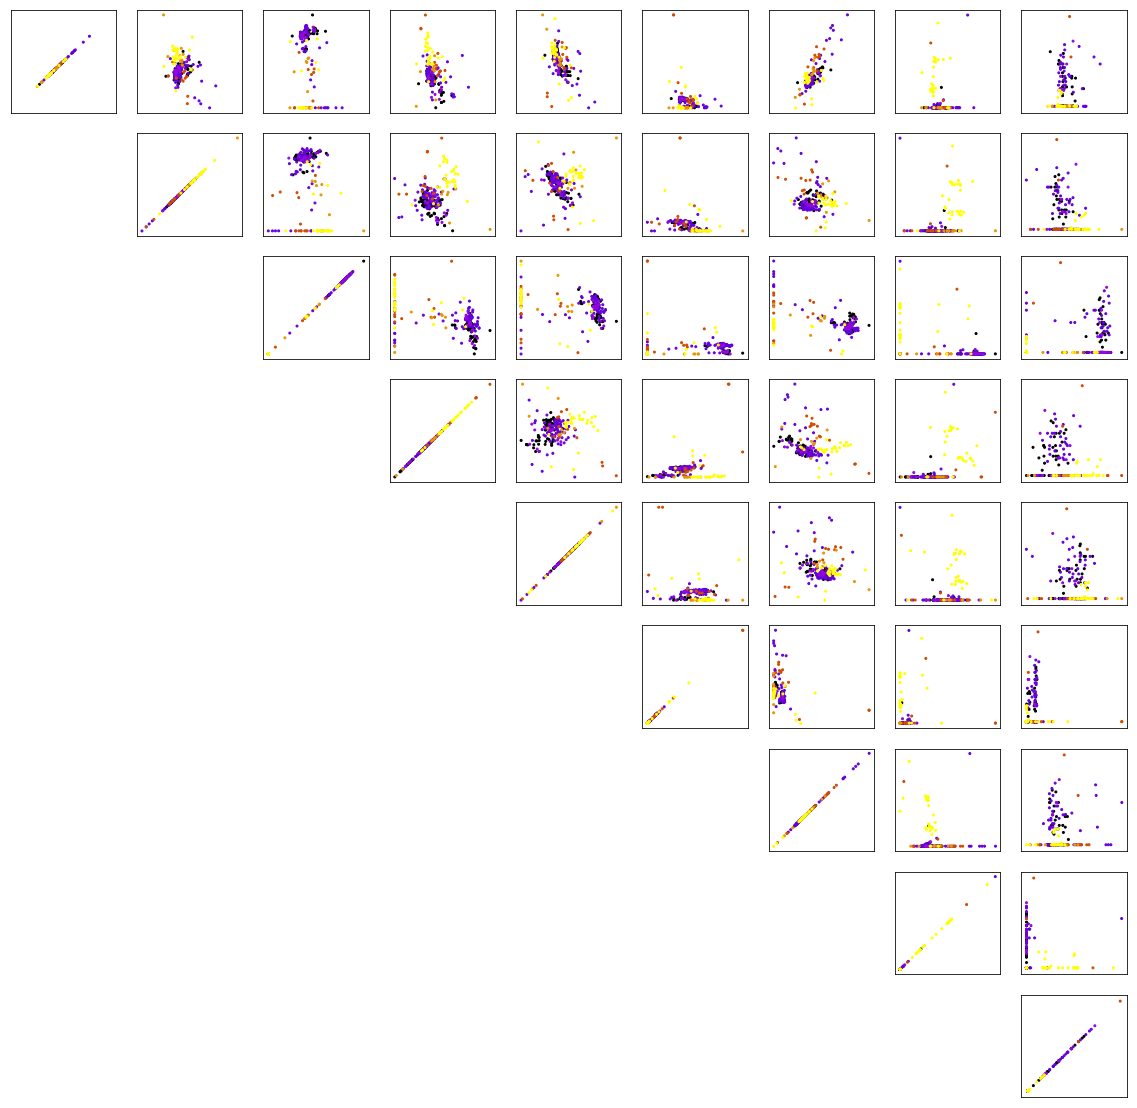

In [60]:
pg.rysujGrupyPoWszystkichKombinacjach(szklo,szkloPrzyporzadkowanie,9)

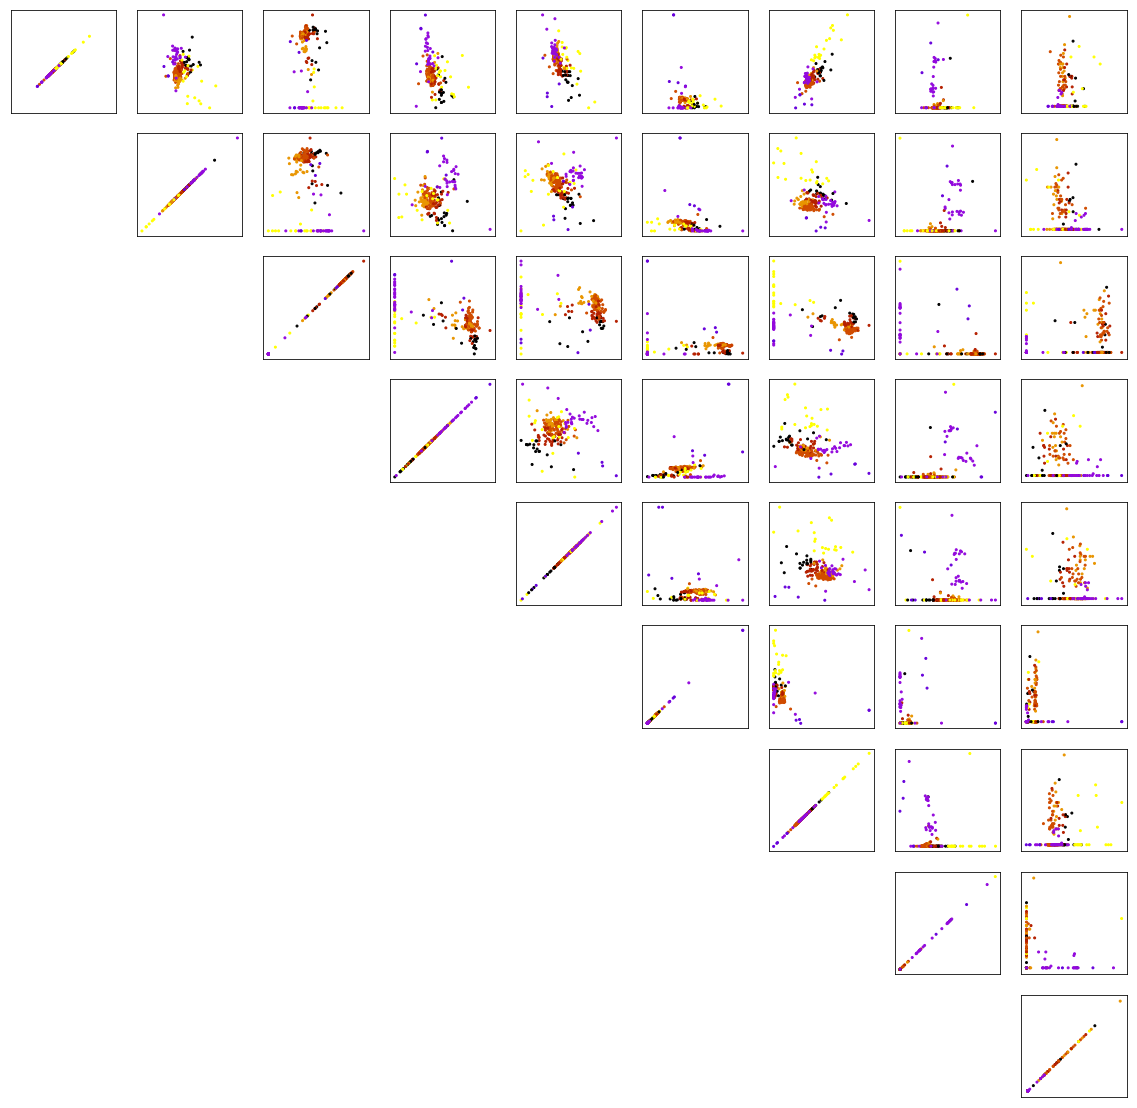

In [61]:
pg.rysujGrupyPoWszystkichKombinacjach(szklo,szkloPrzyporzadkowanieE,9)

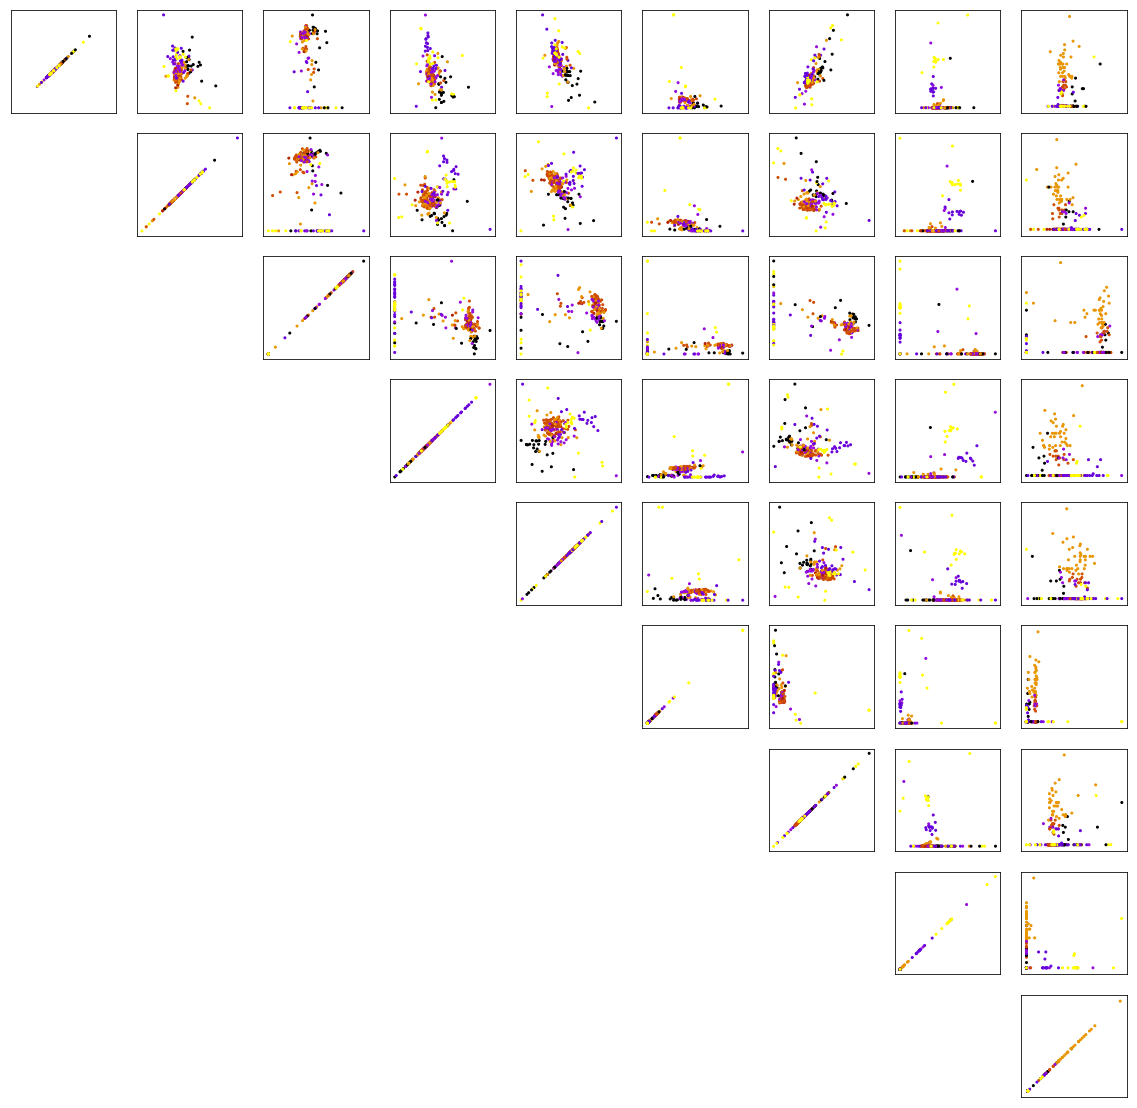

In [62]:
pg.rysujGrupyPoWszystkichKombinacjach(szklo,szkloPrzyporzadkowanieM,9)

In [101]:
def kwdOdlWGrupach(punkty, centra, przynaleznosc, K,f_odl):
    tabOdleglosci=np.zeros(K)
    for i in range(K):
        maska=np.ma.masked_not_equal(przynaleznosc, i).mask
        punktyWGrupie=np.ma.array(data=punkty,mask=np.broadcast_to(maska,np.shape(punkty)))
        odl=f_odl(punktyWGrupie,centra[:,i])
        tabOdleglosci[i]=np.sum(odl)
    return tabOdleglosci

In [102]:
X=np.array([[1,2,7],[3,4,8],[5,6,0]])
X

array([[1, 2, 7],
       [3, 4, 8],
       [5, 6, 0]])

In [103]:
C=np.array([[1,1],[1,3],[4,0]])
C

array([[1, 1],
       [1, 3],
       [4, 0]])

In [104]:
P=np.array([1,1,2])
P

array([1, 1, 2])

In [105]:
M=np.ma.masked_not_equal(P,1).mask
M

array([False, False,  True])

In [106]:
mb=np.broadcast_to(M,np.shape(X))

In [107]:
np.ma.array(data=X,mask=np.broadcast_to(M,np.shape(X)))

masked_array(
  data=[[1, 2, --],
        [3, 4, --],
        [5, 6, --]],
  mask=[[False, False,  True],
        [False, False,  True],
        [False, False,  True]],
  fill_value=999999)

In [110]:
kwdOdlWGrupach(X,C,P,2,km.kwdOdlEuklidesa)

IndexError: tuple index out of range

In [111]:
i=0

In [113]:
tabOdleglosci=np.zeros(2)